## Quantum Teleportation: How to send a qubit?

In [27]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from funcs import *
import numpy as np

## Build Quantum Circuit

### Step1 : Prepare a  $ \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle $ entanglement. Distribute them to Alice and Bob.

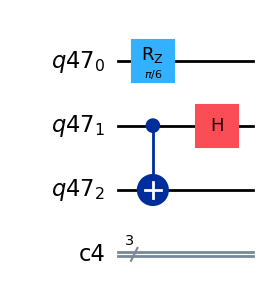

In [28]:
qc = QuantumCircuit()
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc.add_register(q, c)
qc.rz(np.pi/6, q[0])
qc.cx(q[1], q[2])
qc.h(q[1])


qc.draw(output='mpl')

### Alice got q1 and Bob got q2. Alice made q1 and q0 (qubit she wanna sent) entangled by CNOT gate.

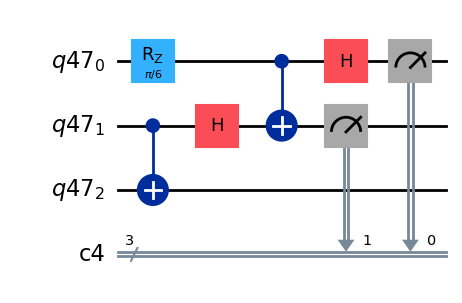

In [29]:
qc.cx(q[0], q[1])
qc.h(q[0])

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.draw(output='mpl')

### Bob operates on his own qubit according to information in classical bit

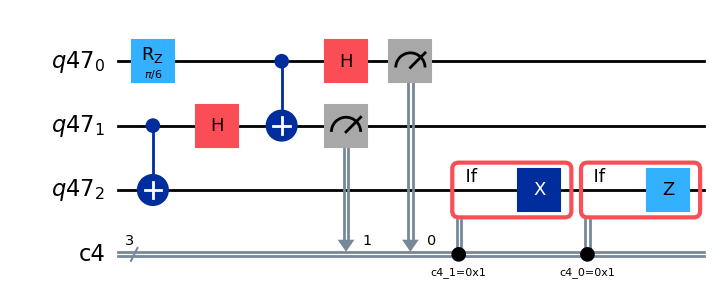

In [30]:
# control qubits by classical bits
# Attention: you can only do this on a simulator

with qc.if_test((c[1], 1)) as else_:  
    qc.x(q[2])
with qc.if_test((c[0], 1)) as else_:  
    qc.z(q[2])

qc.draw(output='mpl')


### Measure q2 to see if it equals original q0

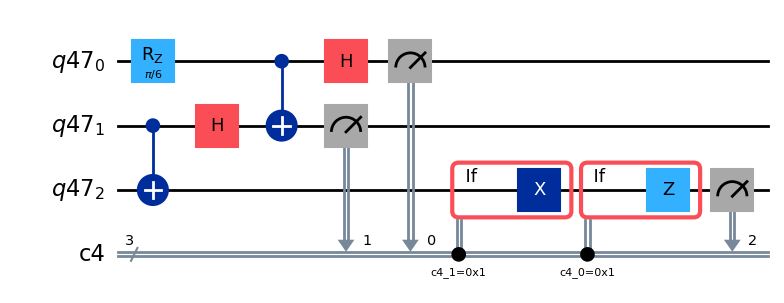

In [31]:
qc.measure(q[2], c[2])
qc.draw(output='mpl')

### execute circuit and process results

In [33]:
results = execute_qc(qc)
print(results)
counts = [0, 0]
for key, value in results.items(): 
    if key[2]=='0':
        counts[0] += value
    else:
        counts[1] += value
print(counts)


{'000': 251, '001': 257, '110': 265, '111': 251}
[516, 508]


### check if the results are expected